In [5]:
import numpy as np

# 1. Cambiar la estructura de los pesos
# De: w = np.array([[...], [...], [...], [...]]) (4×3)
# A: w = np.random.rand(4, 5, 5)  # 4 características × 5 filas × 5 columnas

# Inicialización de pesos (ejemplo con valores aleatorios)
w = np.random.rand(4, 5, 5) * 2 + 4  # Valores entre 4 y 6 aproximadamente

# 2. Modificar el cálculo de distancias
def calcular_distancias(individuo, w):
    distancias = np.zeros((5, 5))
    for i in range(5):
        for j in range(5):
            distancias[i,j] = np.sum((w[:,i,j] - individuo)**2)
    return distancias

# 3. Encontrar la neurona ganadora (Best Matching Unit)
def encontrar_bmu(distancias):
    return np.unravel_index(np.argmin(distancias), distancias.shape)

# 4. Actualizar la función de vecindad
def actualizar_pesos(individuo, w, bmu, pa, radio_vecindad):
    for i in range(5):
        for j in range(5):
            # Calcular distancia en la cuadrícula (no en el espacio de características)
            distancia_grid = (i-bmu[0])**2 + (j-bmu[1])**2
            
            if distancia_grid <= radio_vecindad**2:
                # Función de aprendizaje (puedes ajustar esta función)
                factor_aprendizaje = pa * np.exp(-distancia_grid / (2*radio_vecindad**2))
                
                # Actualizar pesos
                w[:,i,j] += factor_aprendizaje * (individuo - w[:,i,j])
    return w

# Parámetros
pa = 0.1
radio_vecindad_inicial = 2.0  # Tamaño inicial de la vecindad
num_epocas = 10

# Cargar datos
individuo = np.loadtxt('iris1.txt', delimiter=',')

# Entrenamiento
for epoca in range(num_epocas):
    print(f"\n--- Época {epoca + 1} ---")
    
    # Reducir el radio de vecindad con el tiempo
    radio_vecindad = radio_vecindad_inicial * (1 - epoca/num_epocas)
    
    for idx in range(len(individuo)):
        # Calcular distancias
        distancias = calcular_distancias(individuo[idx], w)
        
        # Encontrar BMU
        bmu = encontrar_bmu(distancias)
        
        # Actualizar pesos
        w = actualizar_pesos(individuo[idx], w, bmu, pa, radio_vecindad)
    
    print(f"Radio de vecindad actual: {radio_vecindad:.2f}")
    print("Pesos actualizados para esta época")

print("\n--- Pesos finales ---")
print(w)


--- Época 1 ---
Radio de vecindad actual: 2.00
Pesos actualizados para esta época

--- Época 2 ---
Radio de vecindad actual: 1.80
Pesos actualizados para esta época

--- Época 3 ---
Radio de vecindad actual: 1.60
Pesos actualizados para esta época

--- Época 4 ---
Radio de vecindad actual: 1.40
Pesos actualizados para esta época

--- Época 5 ---
Radio de vecindad actual: 1.20
Pesos actualizados para esta época

--- Época 6 ---
Radio de vecindad actual: 1.00
Pesos actualizados para esta época

--- Época 7 ---
Radio de vecindad actual: 0.80
Pesos actualizados para esta época

--- Época 8 ---
Radio de vecindad actual: 0.60
Pesos actualizados para esta época

--- Época 9 ---
Radio de vecindad actual: 0.40
Pesos actualizados para esta época

--- Época 10 ---
Radio de vecindad actual: 0.20
Pesos actualizados para esta época

--- Pesos finales ---
[[[5.12264519 5.43499778 5.11391587 5.51400715 5.53300561]
  [4.6734915  5.46335671 5.89839162 6.08923634 5.78471184]
  [5.32370173 6.12924443 6.4

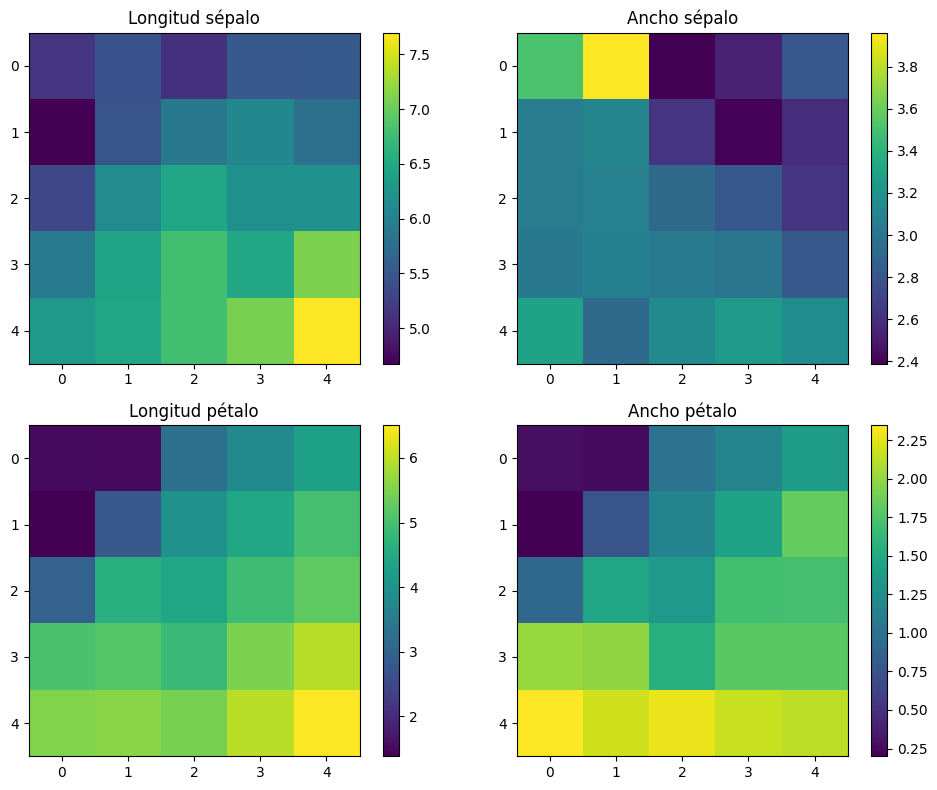

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(10,8))
caracteristicas = ['Longitud sépalo', 'Ancho sépalo', 'Longitud pétalo', 'Ancho pétalo']

for i, ax in enumerate(axs.flat):
    im = ax.imshow(w[i,:,:], cmap='viridis')
    ax.set_title(caracteristicas[i])
    fig.colorbar(im, ax=ax)

plt.tight_layout()
plt.show()

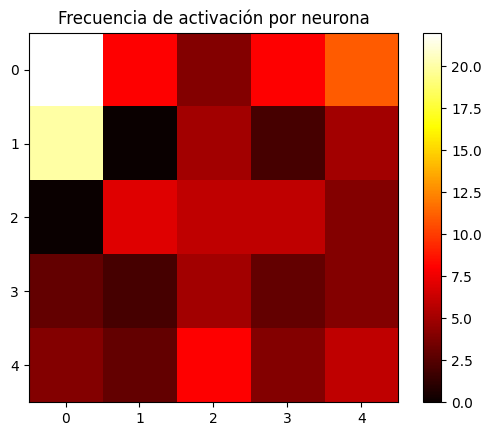

In [8]:
# Asignar clusters
clusters = np.zeros((5,5))
conteos = np.zeros((5,5))

for dato in individuo:
    distancias = calcular_distancias(dato, w)
    i, j = encontrar_bmu(distancias)
    conteos[i,j] += 1
    # Aquí podrías sumar información de clases si las tuvieras

plt.imshow(conteos, cmap='hot')
plt.colorbar()
plt.title("Frecuencia de activación por neurona")
plt.show()